In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import timedelta
import os

Procesamiento de Tweets

In [2]:
dft= pd.read_csv("Tweets/Tweet.csv")
dfct=pd.read_csv("Tweets/Company_Tweet.csv")
df=pd.merge(dft, dfct, on='tweet_id', how='inner')
df.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


removiendo columnas innecesarias y agregando deslpazamiendo de 1 dia

In [3]:
df=df[["tweet_id","ticker_symbol","post_date","body","comment_num","retweet_num","like_num"]]
df['post_date'] = pd.to_datetime(df['post_date'], unit='s')
df['post_date'] = df['post_date'].dt.date
df['post_date'] = df['post_date'] + timedelta(days=-1)
#verificando nulls
has_null = df.isna().any().any()
print(has_null) #False
df.head()

False


,tweet_id,ticker_symbol,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,AAPL,2014-12-31,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,AAPL,2014-12-31,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,AMZN,2014-12-31,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,TSLA,2014-12-31,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,AAPL,2014-12-31,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


Analisis de datos de tweets

Datos generales

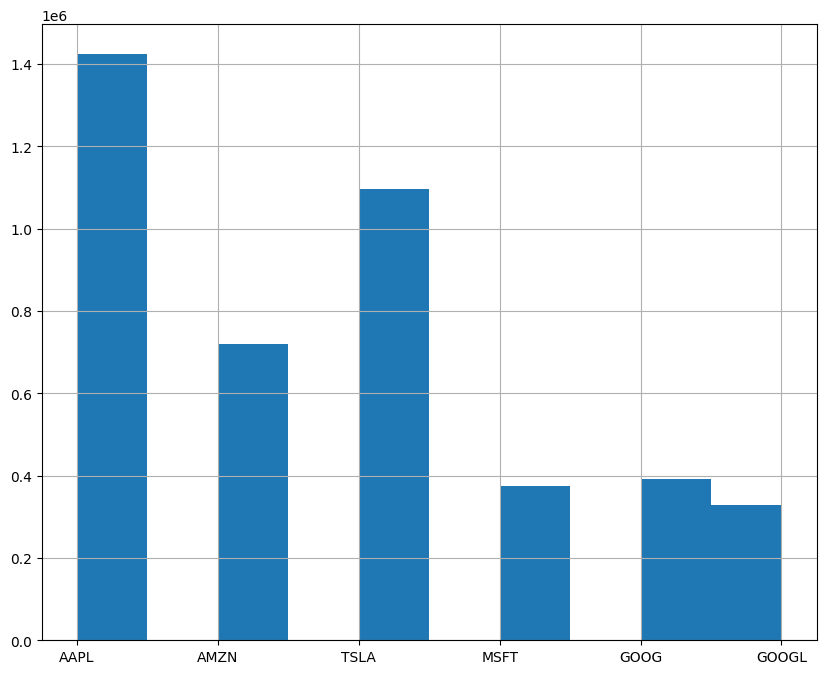

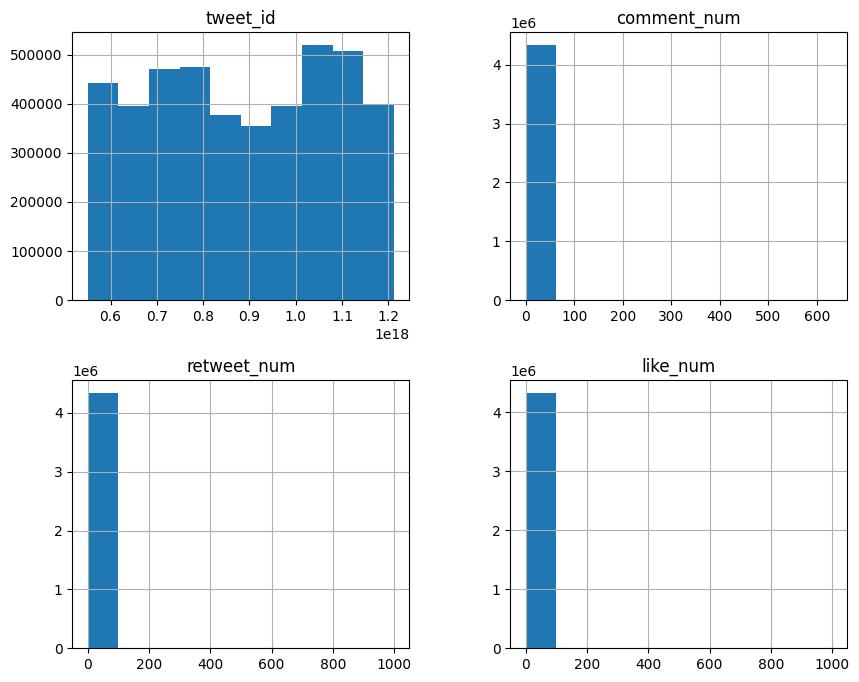

In [4]:
df["ticker_symbol"].hist(figsize=(10,8))
df.hist(figsize=(10,8))
plt.show()

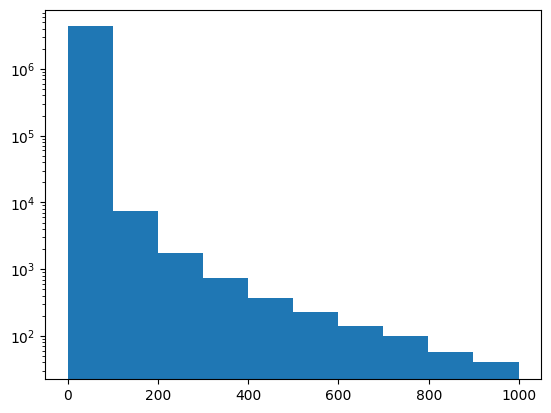

In [5]:
plt.hist(df["like_num"],log=True)
plt.show()


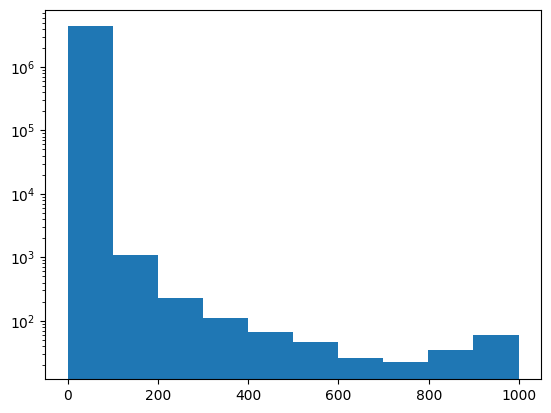

In [6]:
plt.hist(df["retweet_num"],log=True)
plt.show()


Specific data for each company

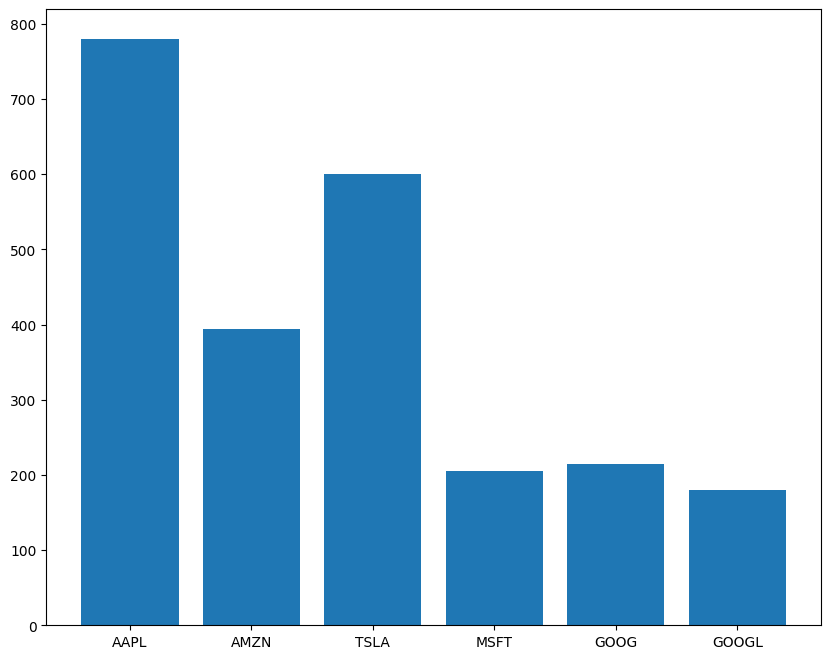

In [7]:
#array of average tweets per day for each company
companies = df["ticker_symbol"].unique()
#how many entries per company
dict = {}
for company in companies:
    dict[company] = len(df[df["ticker_symbol"] == company])


days_count = len(df["post_date"].unique())

#average tweets per day
dict2 = {}
for company in companies:
    dict2[company] = dict[company]/days_count

#plot average tweets per day
plt.figure(figsize=(10,8))
plt.bar(range(len(dict2)), list(dict2.values()), align='center')
plt.xticks(range(len(dict2)), list(dict2.keys()))
plt.show()

AAPL


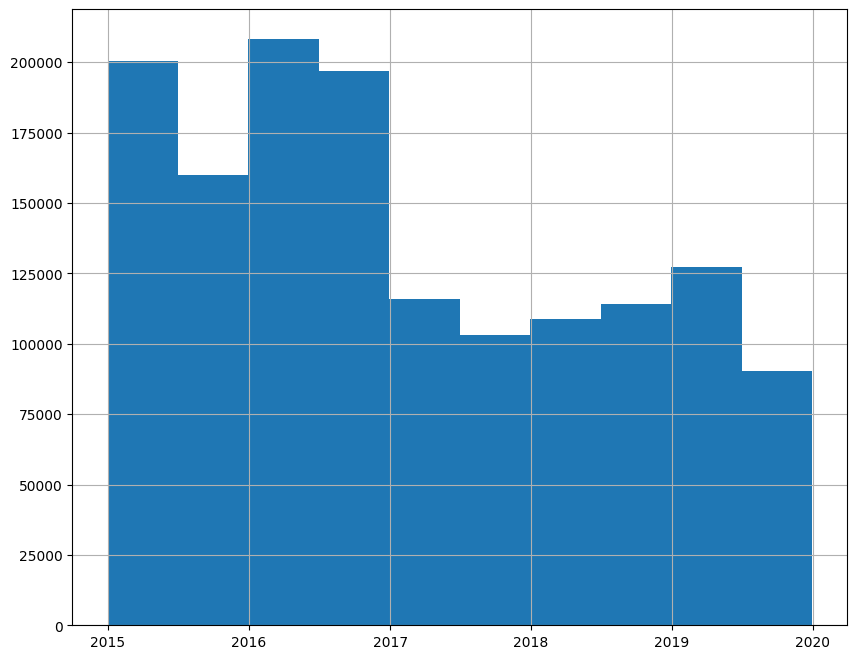

AMZN


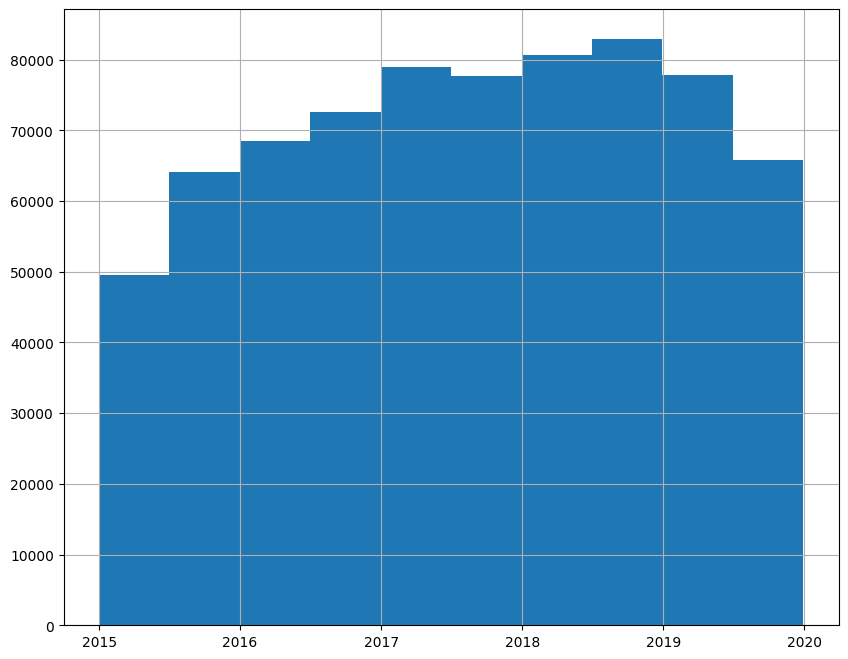

TSLA


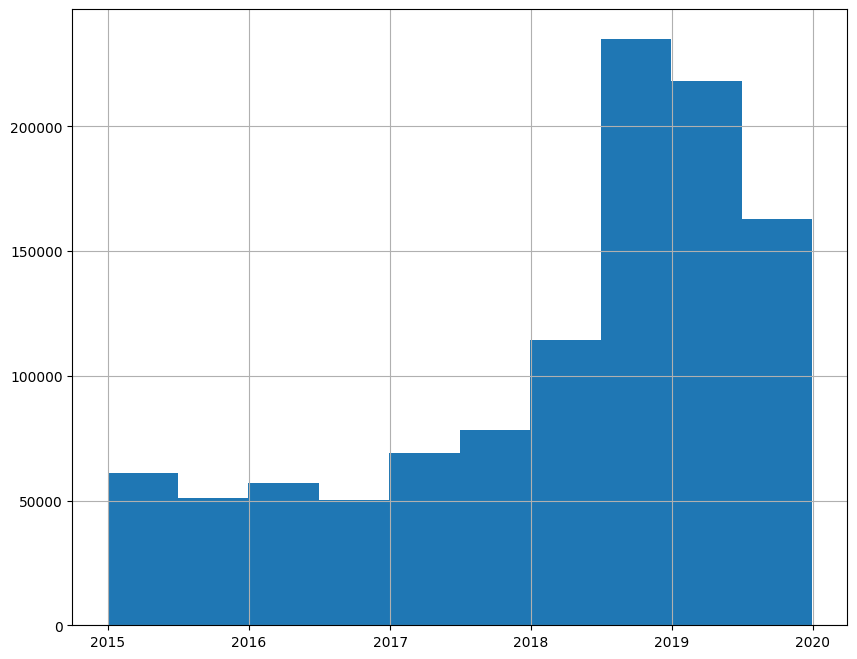

MSFT


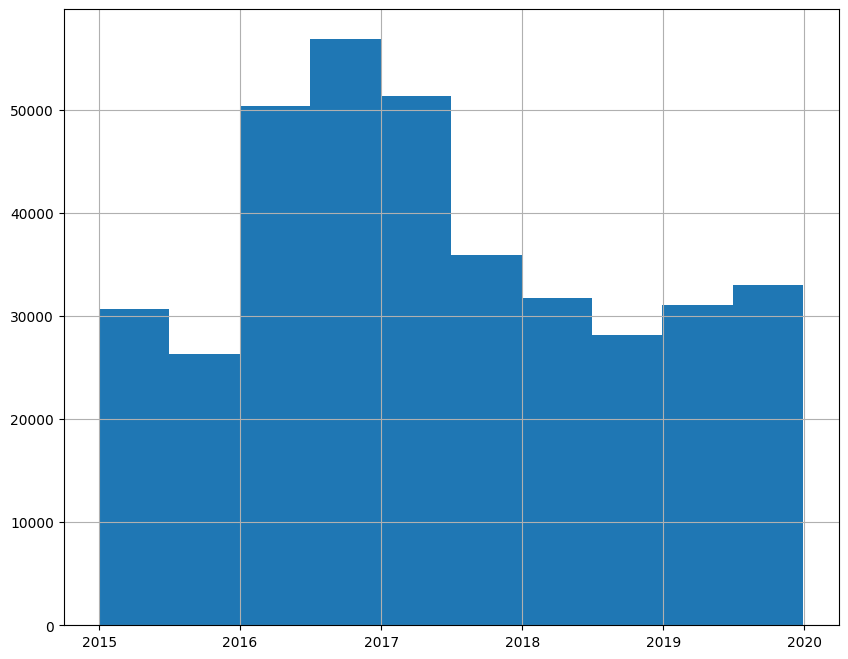

GOOG


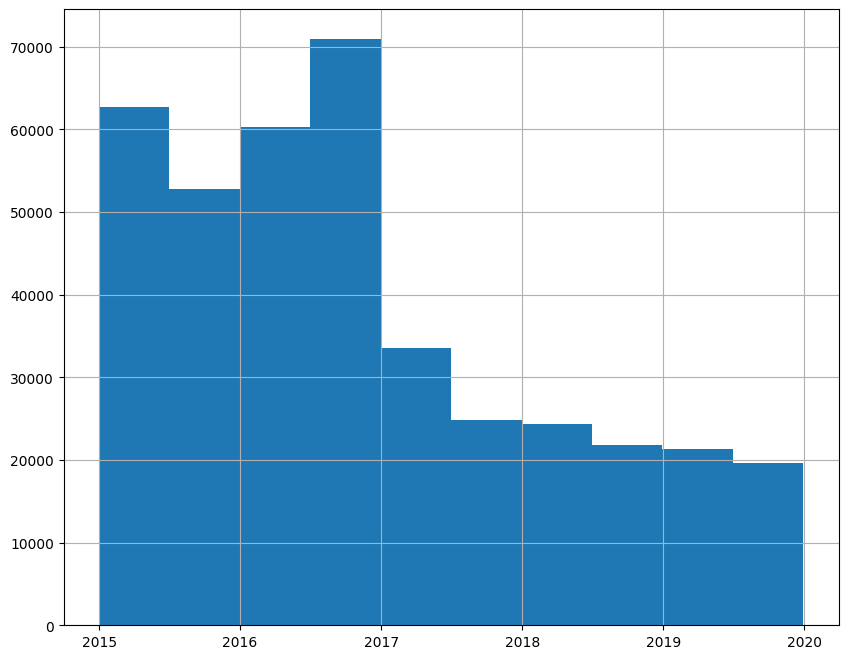

GOOGL


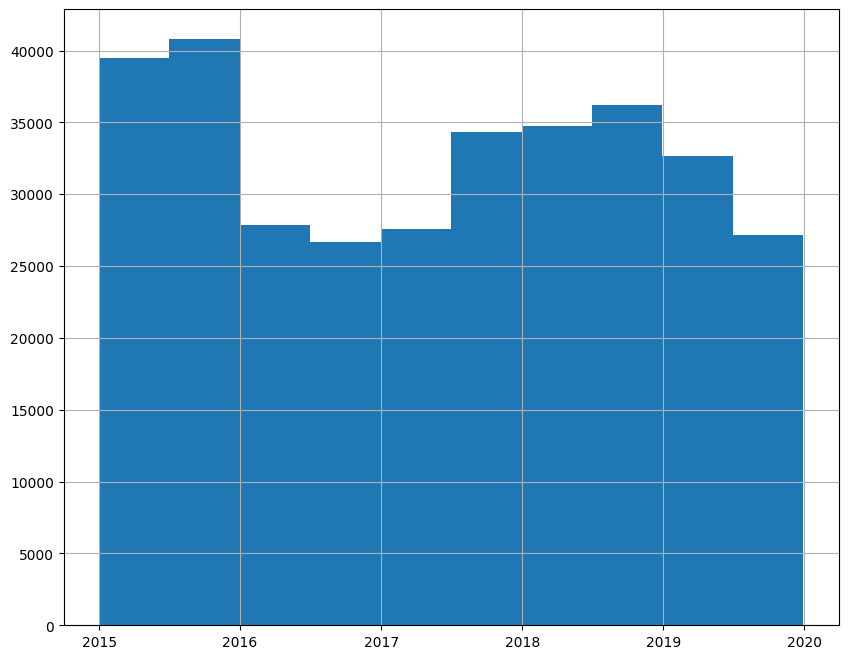

In [8]:
#get different dataset for each company
dict3 = {}
for company in companies:
    dict3[company] = df[df["ticker_symbol"] == company]

#plot each company dataframe 
for company in companies:
    print(company)
    dict3[company]['post_date'].hist(figsize=(10,8))
    plt.show()


Guardar datos

In [9]:
df.to_csv("Data/CompanyTweets.csv", index=False)

stock data

Unir datos de todas las empresas

In [10]:
folder_path = 'Stocks'  

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
dfs = []
for csv_file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, csv_file))
    df['ticker_symbol'] = csv_file.rsplit('.', 1)[0]
    print(csv_file.rsplit('.', 1)[0], df.shape[0]/5)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
final_df=df[['Date','ticker_symbol','Open','High','Low','Close','Adj Close','Volume']]
df.head()

AAPL 251.6
MSFT 251.6
AMZN 251.6
GOOG 251.6
TSLA 251.6
GOOGL 251.6


,Date,Open,High,Low,Close,Adj Close,Volume,ticker_symbol
0,2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498682,212818400,AAPL
1,2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808516,257142000,AAPL
2,2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810760,263188400,AAPL
3,2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144634,160423600,AAPL
4,2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072321,237458000,AAPL


In [11]:
df=final_df[['Date','ticker_symbol','Open','High','Low','Close','Volume']]
df.head()

,Date,ticker_symbol,Open,High,Low,Close,Volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,237458000


Guardar datos

In [12]:
df.to_csv("Data/StocksJoined.csv", index=False)

Datos macroeconomicos

In [13]:
df=pd.read_csv('Indicators/macro_monthly.csv')
df.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,1981-01-01,7.5,10.9,1612.900,4980.4,1870.0,NaN,12.568571,19.084516,NaN,51.1668,85.4
1,1981-02-01,7.4,10.8,1608.125,4965.0,1884.2,NaN,13.194444,15.934286,NaN,50.9509,85.9
2,1981-03-01,7.4,10.8,1629.400,4979.0,1902.9,NaN,13.115909,14.703871,NaN,51.2066,86.4
3,1981-04-01,7.2,10.9,1665.575,4965.1,1904.4,NaN,13.679524,15.719000,NaN,50.9711,87.0
4,1981-05-01,7.5,11.0,1655.150,4974.8,1913.8,NaN,14.099500,18.517742,NaN,51.2645,87.8


In [14]:
df['DATE'] = pd.to_datetime(df['DATE'])
filtered_df = df[(df['DATE'] >= "2015-01-01") & (df['DATE'] <= "2020-01-01")].reset_index(drop=True)
filtered_df.head()

,DATE,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,2015-01-01,5.7,8.0,11759.100,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
1,2015-02-01,5.5,8.1,11818.575,13271.8,12083.1,107.42,1.975263,0.110714,1080165.0,102.2292,240.172
2,2015-03-01,5.4,7.7,11943.020,13233.7,12132.2,109.65,2.042727,0.112903,1095643.0,101.8945,240.755
3,2015-04-01,5.4,7.6,12020.125,13262.8,12170.3,109.04,1.935000,0.124667,1123360.0,101.2859,241.346
4,2015-05-01,5.6,7.5,11896.350,13284.7,12233.6,108.55,2.197500,0.123226,1145069.0,100.8408,241.688


Unir datos de stocks con datos macroeconomicos

In [15]:
df2=pd.read_csv('Data/StocksJoined.csv')
df2['Date'] = pd.to_datetime(df2['Date'])
df2.head()

,Date,ticker_symbol,Open,High,Low,Close,Volume
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,212818400
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,257142000
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,263188400
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,160423600
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,237458000


In [16]:
filtered_df['period']=filtered_df['DATE'].dt.to_period('M')
df2['period']=df2['Date'].dt.to_period('M')
merged_df = df2.merge(filtered_df, on='period', how='inner')
df=merged_df[['Date', 'ticker_symbol', 'Open', 'High', 'Low','Close','Volume', 'unrate', 'psr', 'm2', 'dspic', 'pce', 'reer', 'ir', 'ffer', 'tcs', 'indpro', 'ccpi']]
df.head(25)

,Date,ticker_symbol,Open,High,Low,Close,Volume,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,2015-01-02,AAPL,27.847500,27.860001,26.837500,27.332500,212818400,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
1,2015-01-05,AAPL,27.072500,27.162500,26.352501,26.562500,257142000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
2,2015-01-06,AAPL,26.635000,26.857500,26.157499,26.565001,263188400,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
3,2015-01-07,AAPL,26.799999,27.049999,26.674999,26.937500,160423600,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
4,2015-01-08,AAPL,27.307501,28.037500,27.174999,27.972500,237458000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
5,2015-01-09,AAPL,28.167500,28.312500,27.552500,28.002501,214798000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
6,2015-01-12,AAPL,28.150000,28.157499,27.200001,27.312500,198603200,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
7,2015-01-13,AAPL,27.857500,28.200001,27.227501,27.555000,268367600,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
8,2015-01-14,AAPL,27.260000,27.622499,27.125000,27.450001,195826400,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811
9,2015-01-15,AAPL,27.500000,27.514999,26.665001,26.705000,240056000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.8815,0.114839,1069010.0,102.8479,239.811


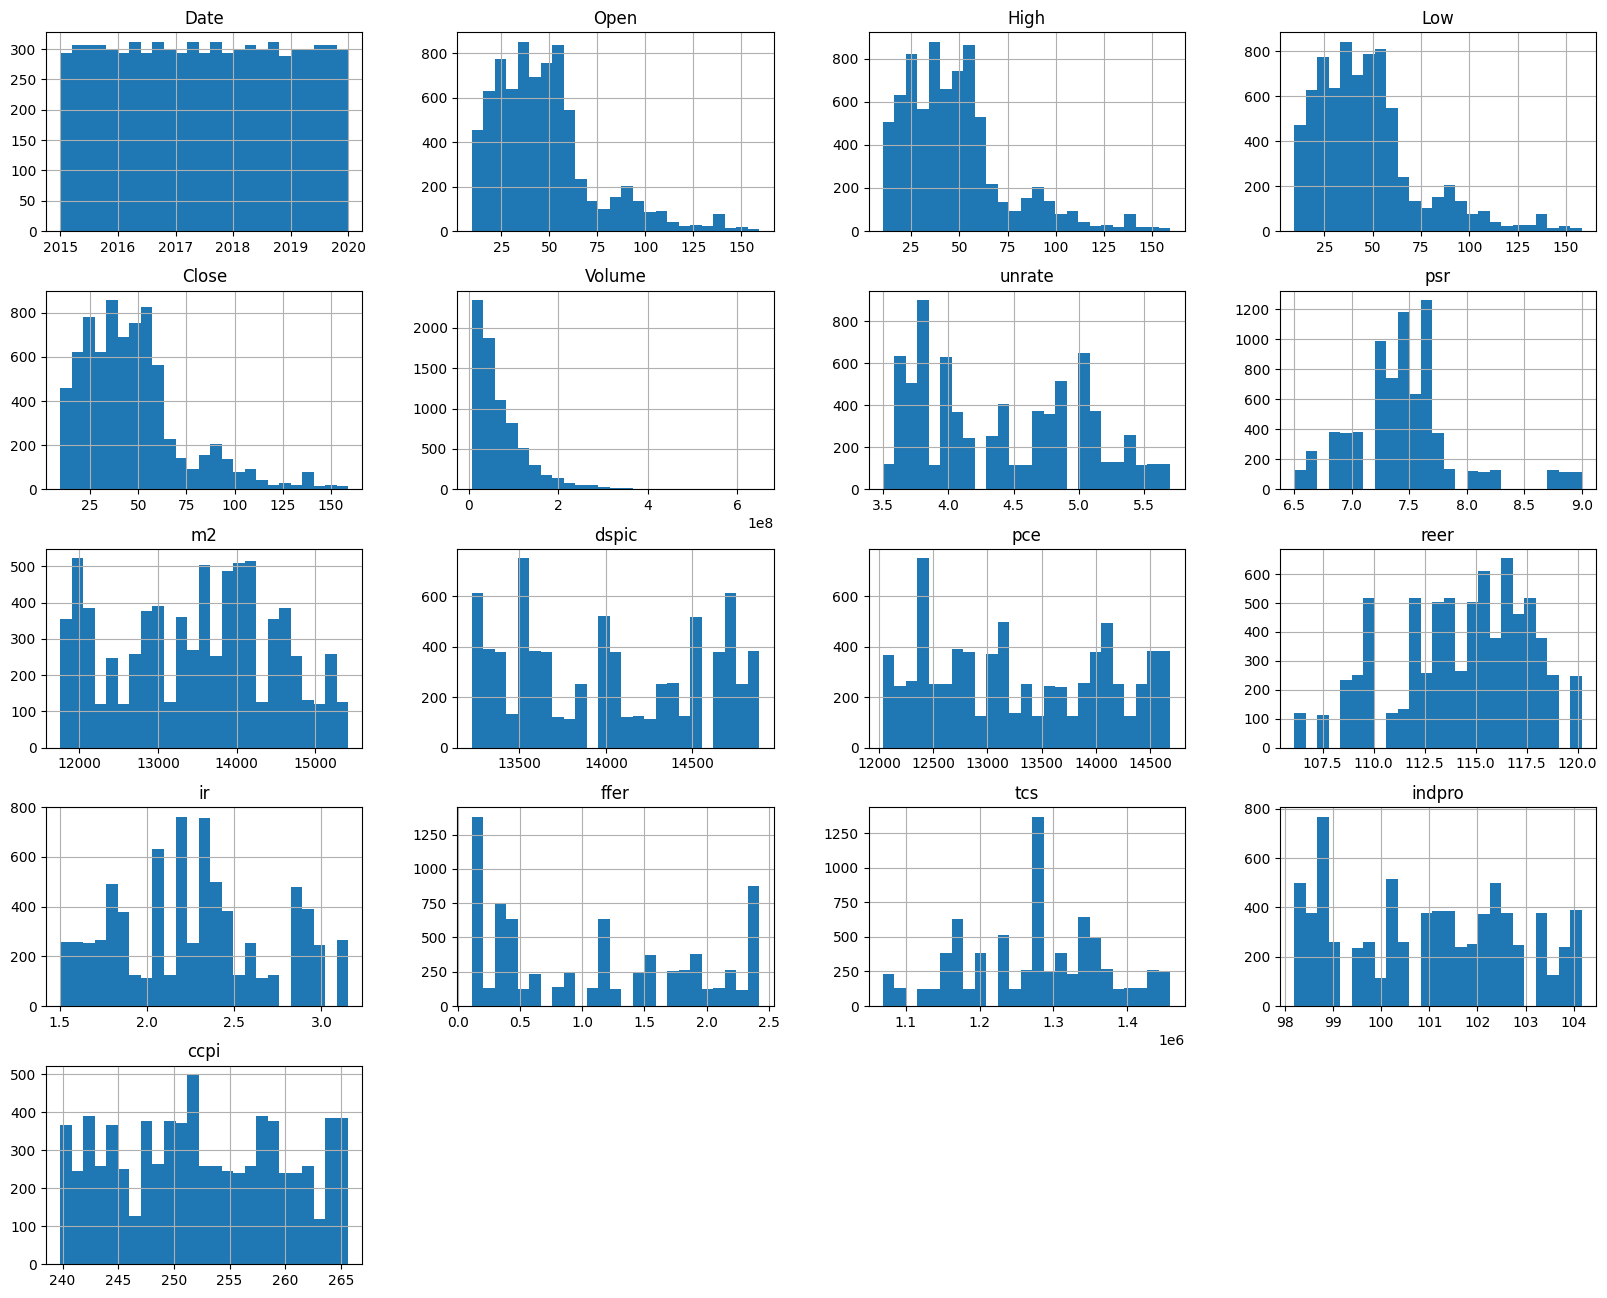

In [17]:
df.hist(figsize=(20,16),bins=25)
plt.show()

Guardar datos

In [18]:
df.to_csv("Data/Incomplete.csv", index=False)

Ponderacion de datos de sentimiento de tweets

In [19]:
twts=pd.read_csv('Data/TweetSentiment.csv')
twts=twts[['ticker_symbol','post_date','retweet_num','like_num','sentiment']]
#shift post_date foward by 2 days
twts['post_date'] = pd.to_datetime(twts['post_date'])
twts['post_date'] = twts['post_date'] + timedelta(days=2)
twts.head()

,ticker_symbol,post_date,retweet_num,like_num,sentiment
0,AAPL,2015-01-02,0,1,0.990795
1,AAPL,2015-01-02,0,0,0.009752
2,AMZN,2015-01-02,0,0,0.698949
3,TSLA,2015-01-02,0,1,0.911501
4,AAPL,2015-01-02,0,1,0.985529


Fromula para ponderacion

In [20]:
import math

def tweet_agreement_score(likes, retweets):
    x = (0.4* (likes) + 0.6* (retweets)) 
    tas = 1 / (1 + math.exp(-x))
    return tas

Ponderacion de tweeter agreement score

In [21]:
tas=[]
for i in range(len(twts['sentiment'])):
    tas.append(((tweet_agreement_score(twts['like_num'][i],twts['retweet_num'][i]))*2-1)*12)

#ttning all items in tas to int
tas = [int(i) for i in tas]
twts['tas']=tas
twts

,ticker_symbol,post_date,retweet_num,like_num,sentiment,tas
0,AAPL,2015-01-02,0,1,0.990795,2
1,AAPL,2015-01-02,0,0,0.009752,0
2,AMZN,2015-01-02,0,0,0.698949,0
3,TSLA,2015-01-02,0,1,0.911501,2
4,AAPL,2015-01-02,0,1,0.985529,2
...,...,...,...,...,...,...
4336440,TSLA,2020-01-01,0,1,0.585092,2
4336441,TSLA,2020-01-01,0,5,0.637585,9
4336442,AAPL,2020-01-01,0,1,0.895456,2
4336443,MSFT,2020-01-01,0,1,0.895456,2


In [22]:
#new dataframe with the rows where tas>0
t=twts[twts['tas']>0].reset_index(drop=True)
#empty dictionary with the same columns as t
dict = []
for i in range(len(t)):
    row=t.iloc[i]
    #append the row to the dictionary t['tas'][i] times
    for j in range(t['tas'][i]):
        dict.append(row)


In [23]:
dict=[list(x) for x in dict]

In [24]:
# Convert list to DataFrame and append
data_df = pd.DataFrame(dict, columns=twts.columns)
data_df


,ticker_symbol,post_date,retweet_num,like_num,sentiment,tas
0,AAPL,2015-01-02,0,1,0.990795,2
1,AAPL,2015-01-02,0,1,0.990795,2
2,TSLA,2015-01-02,0,1,0.911501,2
3,TSLA,2015-01-02,0,1,0.911501,2
4,AAPL,2015-01-02,0,1,0.985529,2
...,...,...,...,...,...,...
8977675,TSLA,2020-01-01,0,5,0.637585,9
8977676,AAPL,2020-01-01,0,1,0.895456,2
8977677,AAPL,2020-01-01,0,1,0.895456,2
8977678,MSFT,2020-01-01,0,1,0.895456,2


In [25]:
#concatenate the two dataframes twts and data_df
twts=pd.concat([twts,data_df], ignore_index=True)
twts

,ticker_symbol,post_date,retweet_num,like_num,sentiment,tas
0,AAPL,2015-01-02,0,1,0.990795,2
1,AAPL,2015-01-02,0,0,0.009752,0
2,AMZN,2015-01-02,0,0,0.698949,0
3,TSLA,2015-01-02,0,1,0.911501,2
4,AAPL,2015-01-02,0,1,0.985529,2
...,...,...,...,...,...,...
13314120,TSLA,2020-01-01,0,5,0.637585,9
13314121,AAPL,2020-01-01,0,1,0.895456,2
13314122,AAPL,2020-01-01,0,1,0.895456,2
13314123,MSFT,2020-01-01,0,1,0.895456,2


In [26]:
#rename column sentiment to p_sentiment
twts.rename(columns={'sentiment':'p_sentiment'}, inplace=True)
twts.reset_index()
twts.head()

,ticker_symbol,post_date,retweet_num,like_num,p_sentiment,tas
0,AAPL,2015-01-02,0,1,0.990795,2
1,AAPL,2015-01-02,0,0,0.009752,0
2,AMZN,2015-01-02,0,0,0.698949,0
3,TSLA,2015-01-02,0,1,0.911501,2
4,AAPL,2015-01-02,0,1,0.985529,2


visualizacion de datos

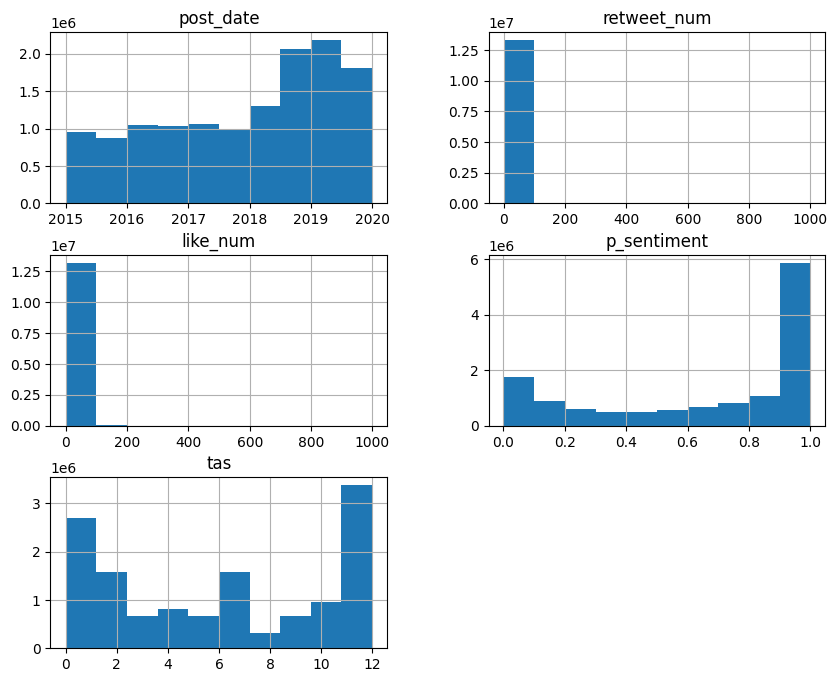

In [27]:
twts.hist(figsize=(10,8))
plt.show()

promedio diario de sentimiento de tweets

In [28]:
sum_twts = twts.groupby(['post_date', 'ticker_symbol']).agg({'p_sentiment': 'mean'}).reset_index()

sum_twts.head()

,post_date,ticker_symbol,p_sentiment
0,2015-01-02,AAPL,0.766185
1,2015-01-02,AMZN,0.506131
2,2015-01-02,GOOG,0.846197
3,2015-01-02,GOOGL,0.819823
4,2015-01-02,MSFT,0.795557


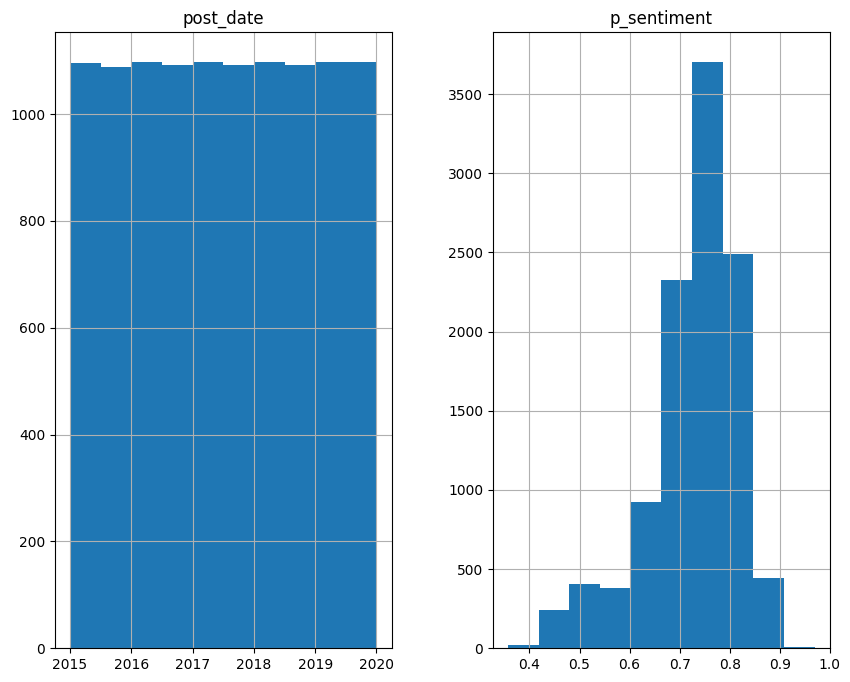

In [29]:
sum_twts.hist(figsize=(10,8))
plt.show()

Union de datos de sentimiento de tweets con datos de stocks

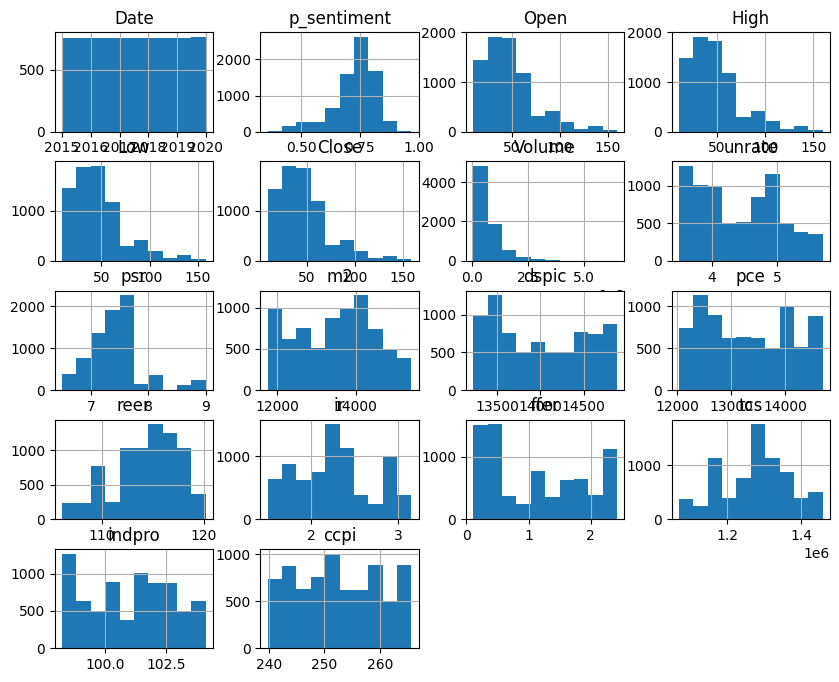

In [30]:
df=pd.read_csv('Data/Incomplete.csv')
df['Date'] = pd.to_datetime(df['Date'])
sum_twts = sum_twts.rename(columns={'post_date': 'Date'})
sum_twts['Date'] = pd.to_datetime(sum_twts['Date'])

merged = pd.merge(sum_twts, df, on=['Date', 'ticker_symbol'], how='inner')
merged.hist(figsize=(10,8))
plt.show()

In [31]:
merged

,Date,ticker_symbol,p_sentiment,Open,High,Low,Close,Volume,unrate,psr,m2,dspic,pce,reer,ir,ffer,tcs,indpro,ccpi
0,2015-01-02,AAPL,0.766185,27.847500,27.860001,26.837500,27.332500,212818400,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
1,2015-01-02,AMZN,0.506131,15.629000,15.737500,15.348000,15.426000,55664000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
2,2015-01-02,GOOG,0.846197,26.378078,26.490770,26.133251,26.168653,28951268,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
3,2015-01-02,GOOGL,0.819823,26.629999,26.790001,26.393999,26.477501,26480000,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
4,2015-01-02,MSFT,0.795557,46.660000,47.419998,46.540001,46.759998,27913900,5.7,8.0,11759.1,13224.7,12036.5,106.11,1.881500,0.114839,1069010.0,102.8479,239.811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7539,2019-12-31,AMZN,0.715115,92.099998,92.663002,91.611504,92.391998,50130000,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651
7540,2019-12-31,GOOG,0.656211,66.505501,66.900002,66.454247,66.850998,19236000,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651
7541,2019-12-31,GOOGL,0.777357,66.789497,67.032997,66.606499,66.969498,19514000,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651
7542,2019-12-31,MSFT,0.683018,156.770004,157.770004,156.449997,157.699997,18369400,3.6,7.3,15416.2,14844.1,14686.3,116.51,1.862857,1.550968,1458485.0,101.6179,265.651


In [33]:
merged.columns

Index(['Date', 'ticker_symbol', 'p_sentiment', 'Open', 'High', 'Low', 'Close',
       'Volume', 'unrate', 'psr', 'm2', 'dspic', 'pce', 'reer', 'ir', 'ffer',
       'tcs', 'indpro', 'ccpi'],
      dtype='object')

In [32]:
#save data in a csv file
merged.to_csv("Data/Complete.csv", index=False)